<a href="https://colab.research.google.com/github/Fezzaioussama/SVM-from-scratch-using-Python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define SVM


In [18]:
import numpy as np

C = 1.0
w = 0
b = 0

#Define Higne Loss function

In [19]:
# Hinge Loss Function / Calculation
def hingeloss(w, b, x, y):
    # Regularizer term
    reg = 0.5 * (w * w)

    for i in range(x.shape[0]):
        # Optimization term
        opt_term = y[i] * ((np.dot(w, x[i])) + b)

        # calculating loss
        loss = reg + C * max(0, 1-opt_term)
    return loss[0][0]

#Gradint descent optimization

In [20]:
def fit(X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = hingeloss(w, b, X, Y)

            # Appending all losses
            losses.append(l)

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb



        return w,b, losses

#Predict Method

In [21]:
def predict(X):

        prediction = np.dot(X,w[0]) +b # w.x + b
        return np.sign(prediction)

#Create Random Dataset

In [22]:
# prediction.py

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Creating dataset
X, yy = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(yy == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

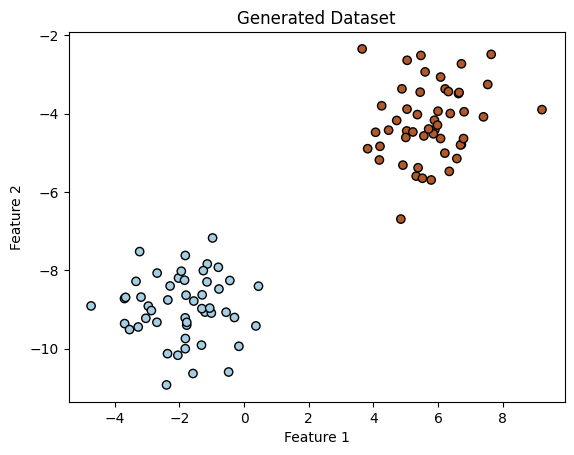

In [23]:
import matplotlib.pyplot as plt

# Scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:

w, b, losses =fit(X_train, y_train)

In [25]:
print(w)
print(b)
print(losses)

[[0.44477983 0.15109913]]
0.05700000000000004
[1.0, 0.07021230572002311, 0.04337669810121732, 0.048996155149764964, 0.055660308995054905, 0.05991419317398984, 0.0639300645342227, 0.06511998402453194, 0.06774286653318795, 0.06885396110405564, 0.07154640211008972, 0.07268425165224654, 0.07382992662872023, 0.07498340129647202, 0.07614464997402351, 0.07731364704132343, 0.07849036693961484, 0.07967478417130242, 0.08086687329982029, 0.0837698706169017, 0.08498792231844662, 0.08621353449331884, 0.08744668203277349, 0.08887537349247536, 0.09012464505107068, 0.09138137324874177, 0.09283771488249136, 0.09411040192233192, 0.09539046745749956, 0.0968742040933603, 0.09648443169864133, 0.09797551376518052, 0.09947652110832368, 0.09907892862779541, 0.10058721765583321, 0.10018629791733229, 0.10170184176003029, 0.10149853977835199, 0.10129564419733506, 0.10109315420458459, 0.10089106898932963, 0.10068938774241996, 0.10048810965632285, 0.10028723392511986, 0.10008675974450355, 0.0998866863117743, 0.099

In [26]:
prediction = predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

Loss: 0.0991126738798482
Prediction: [-1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
Accuracy: 1.0
w, b: [array([[0.44477983, 0.15109913]]), 0.05700000000000004]


In [28]:
print(prediction==y_test)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


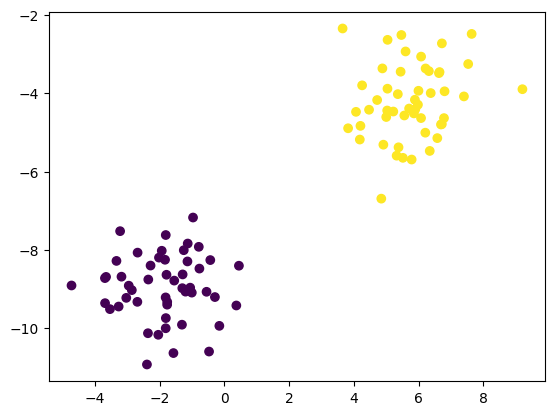

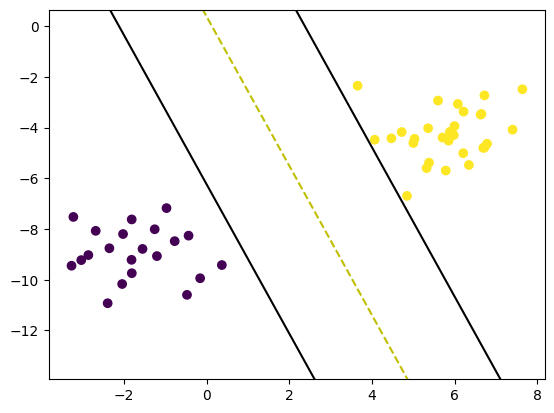

In [42]:
# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()